In [43]:
import numpy as np
import pulser
from pulser.devices import DigitalAnalogDevice
from pulser.register import Register
from pulser.pulse import Pulse
from pulser.waveforms import BlackmanWaveform

One task would be to write an algoritm to take a graph given by $G = (V, E)$ into the needed form.   
The graph needs to be a unit disk graph to fully work.   
I won't do this here and just show an example graph.

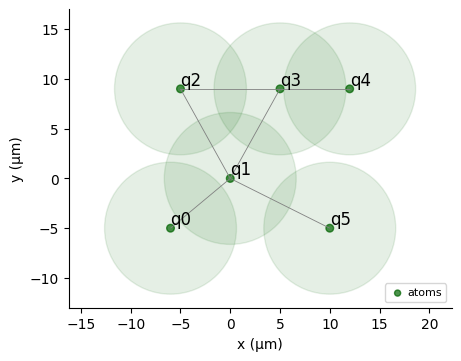

In [44]:
coords = np.array([
    [-6, -5],
    [0, 0],
    [-5, 9],
    [5, 9],
    [12, 9],
    [10, -5],
])

qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)
reg.draw(
    blockade_radius=DigitalAnalogDevice.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True,
)

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipEmulator
from pulser.devices import DigitalAnalogDevice
from pulser.waveforms import InterpolatedWaveform
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform

In [46]:
# We choose a median value between the min and the max
# Omega = np.median(Q[Q > 0].flatten())
# Omega = np.median(Q[Q > 1e-3].flatten())
Omega = 2.
delta_0 = -4.  # just has to be negative
delta_f = -delta_0  # just has to be positive
T = 10_000  # time in ns, we choose a time long enough to ensure the propagation of information in the system

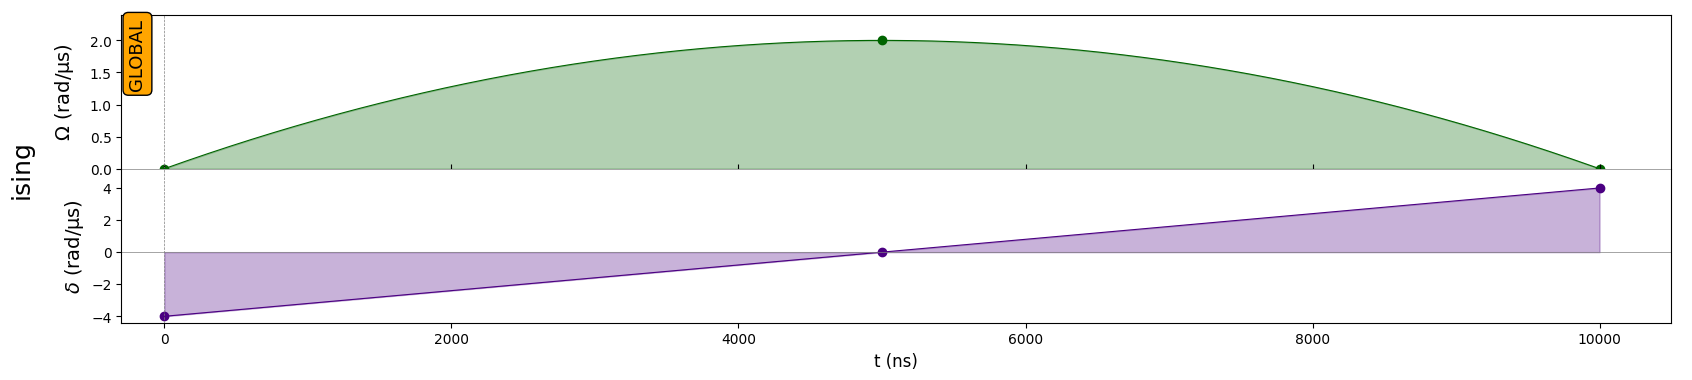

In [47]:
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_0, 0, delta_f]),
    0,
)
seq = Sequence(reg, DigitalAnalogDevice)
seq.declare_channel("ising", "rydberg_global")
seq.add(adiabatic_pulse, "ising")
seq.draw()

In [48]:
simul = QutipEmulator.from_sequence(seq)
results = simul.run()
final = results.get_final_state()
count_dict = results.sample_final_state()

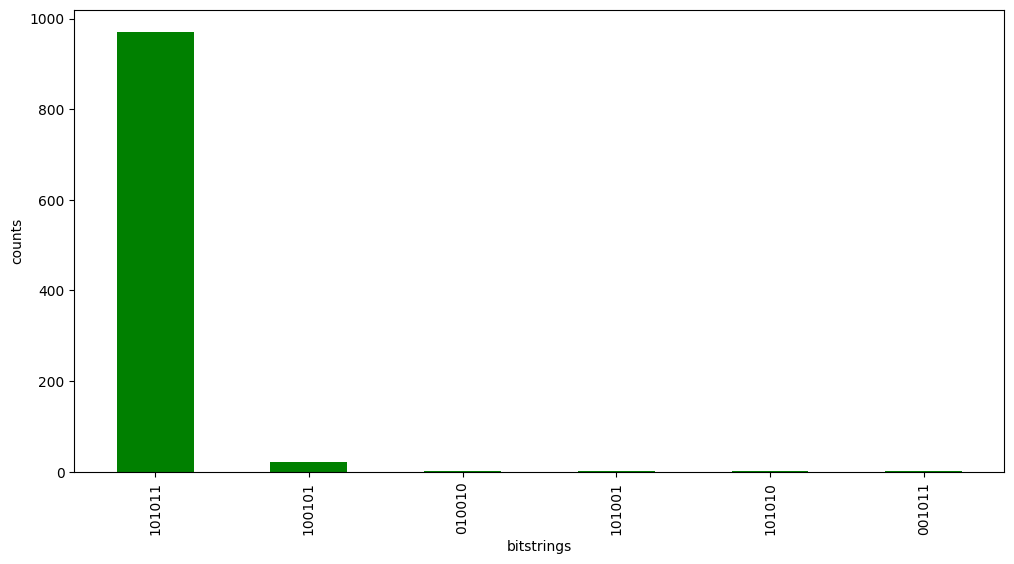

In [49]:
def plot_distribution(C, sols=[]):
    C = dict(sorted(C.items(), key=lambda item: item[1], reverse=True))
    color_dict = {key: "r" if key in sols else "g" for key in C}
    plt.figure(figsize=(12, 6))
    plt.xlabel("bitstrings")
    plt.ylabel("counts")
    plt.bar(C.keys(), C.values(), width=0.5, color=color_dict.values())
    plt.xticks(rotation="vertical")
    plt.show()

plot_distribution(count_dict)

In [50]:
# get key with max value
count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1], reverse=True))
key = list(count_dict.keys())[0]
print(key)

101011


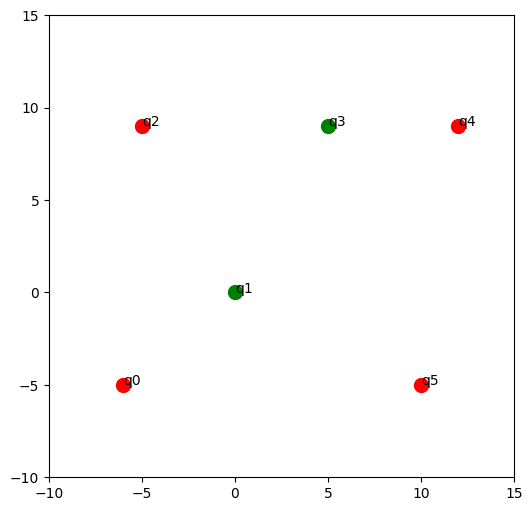

In [51]:
# plot coordinates
plt.figure(figsize=(6, 6))
for i, coords in enumerate(coords):
    plt.text(*coords, f"q{i}")
    if key[i] == "1":
        plt.scatter(*coords, color="r", s=100)
    else:
        plt.scatter(*coords, color="g", s=100)

plt.xlim(-10, 15)
plt.ylim(-10, 15)
plt.show()